IMAGE CLASSIFICATION


In [3]:
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/Users/kartikaybhardwaj/COLLEGE/machine_learning/week08/cropped/2.png'
img2 = Image.open(path).convert('L')

plt.imshow(img2)
plt.title("simpsons")
plt.show()

Now Converting the images data into uniform datset , fixed size , and convert them into grayscale

In [4]:
import os

def load_images(data_dir , target_size=(225,225)):
    images = []
    labels = []

    class_name = os.listdir(data_dir)
    for class_name in class_name:
        class_dir = os.path.join(data_dir , class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir , img_name)
            try:
                img = Image.open(img_path).resize(target_size).convert("L")
                img_array = np.array(img).flatten()/np.max(np.array(img))
                images.append(img_array)
                labels.append(class_name)
            except Exception as e:
                print(f"Error Loading image {img_path}: {e}")
                continue
    return np.array(images) , np.array(labels)


In [5]:
images , labels = load_images('/Users/kartikaybhardwaj/COLLEGE/machine_learning/week08/data')

In [42]:
images.shape

(7553, 50625)

In [43]:
labels.shape

(7553,)

Question1 : how many unique labels are there

In [12]:
np.unique_counts(labels)

UniqueCountsResult(values=array(['with_mask', 'without_mask'], dtype='<U12'), counts=array([3725, 3828]))

Question2: split the dataset with 20% datapoints for test set and keep the random_state = 42. Train a decsision Tree Classifier model with default parameters and random_state = 42 and print the Classification_report and confusion matrix

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report , ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [7]:
X_train , X_test , y_train , y_test = train_test_split(images,labels,test_size=0.2,random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [13]:
np.unique_counts(y_train)

UniqueCountsResult(values=array([0, 1]), counts=array([2964, 3078]))

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = dt.predict(X_test)

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       761
           1       0.78      0.78      0.78       750

    accuracy                           0.78      1511
   macro avg       0.78      0.78      0.78      1511
weighted avg       0.78      0.78      0.78      1511



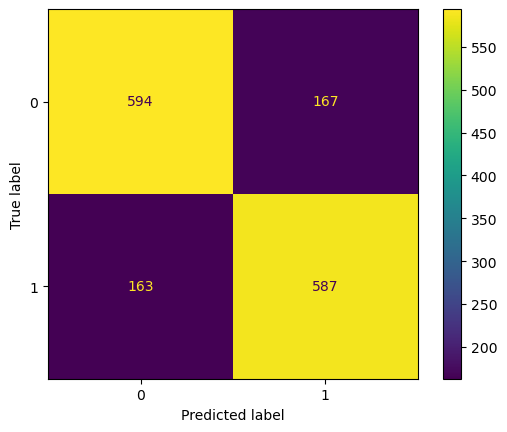

In [11]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
confusion_matrix

Question3 : augment all the images (flipped left right) using rotation on train dataset , train a logisticRegression model with random_state=42 , max_iter=50 , tol=0.001 , C=1 

and tell the accuracy , precision of class simpsons and recall of class simpsons on test set 

In [14]:
import random 
def augmented_data(data,labels,augmentation_factor=2):
    augmented_images = []
    augmented_labels = []
    for image , label in zip(data,labels):
        augmented_images.append(image)
        augmented_labels.append(label)

        for i in range(augmentation_factor):
            # deciding angle 
            angle = random.uniform(-30,30)
            img = Image.fromarray((image.reshape((225,225))*255).astype(np.uint8))

            # rotating image
            img = img.rotate(angle)
            rotated_image = np.array(img).flatten()/255.0

            # append augmented images to the array 
            augmented_images.append(rotated_image)
            augmented_labels.append(labels)
    return np.array(augmented_images) , np.array(augmented_labels)

In [ ]:
X_train_aug , y_train_aug = augmented_data(X_train,y_train)
